# Часть 2. Моделирование.

## hierarhical 

Подберём оптимальное количество кластеров при помощи Silhouette plot.

In [1]:
import pandas as pd

df = pd.read_csv(r'.\german_credit_data_Preprocessed.csv')

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn import decomposition
from plotly import express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

n_components = 9 # PCA
x_component = 0
y_component = 3
X = df

def agg_clustering(n_clusters, X, linkage = 'ward', plot = False):
    agg = AgglomerativeClustering(n_clusters=n_clusters, linkage = linkage).fit(X)

    if plot:
        labels = agg.labels_
        pca = decomposition.PCA(n_components=n_components, random_state=1)
        pca.fit(X)
        X_pca = pca.transform(X)
        plt.scatter(X_pca[:,x_component], X_pca[:,y_component], c=labels)
        plt.title(str(n_clusters)+' кластеров')
        plt.savefig('AgglomerativePlusPCA_clusters.png')
        plt.show();
        
    return agg


## Cилуэтный коэффициент

100%|████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 24.06it/s]


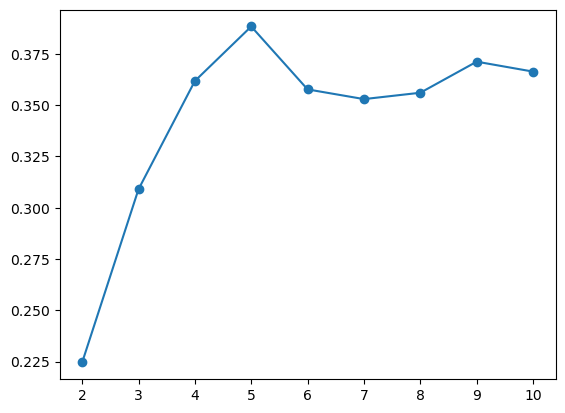

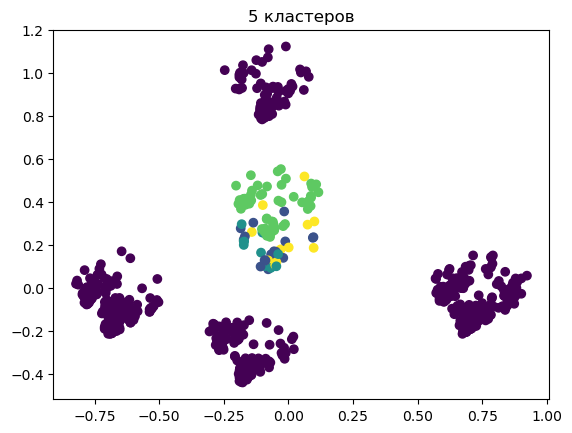

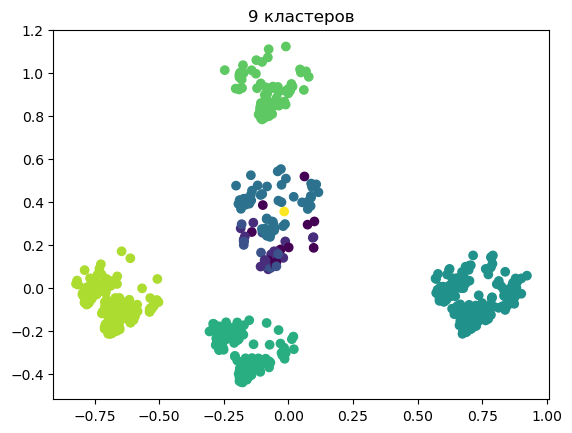

In [3]:
# Manual settings

n_optimals = 2 # Число самых оптимальных по метрике вариантов, которые надо вывести на экран

#

def sort_results(silhouette):
    d = {}
    for i, y in enumerate(silhouette):
        x = i + 2
        d[y] = x
    return list(map(lambda i: d[i], reversed(sorted(filter(lambda k: k > 0, d)))))

def calc_silhouette_by_n_clusters(fun_clustering, n):
    silhouette = []
    for i in tqdm(range(2,11)):
        agg = fun_clustering(i, X)
        labels = agg.labels_
        score = silhouette_score(X, labels)
        silhouette.append(score)

    plt.plot(range(2,11), silhouette, marker='o');
    plt.show()
    return sort_results(silhouette)[:n]
    

optimal_ones = calc_silhouette_by_n_clusters(agg_clustering, n_optimals)

for optimal in optimal_ones:
    agg_clustering(optimal, X, linkage = 'single', plot = True)

## Результат

Более приемлемо выглядит вариант с числом кластеров: 9. Но пришлось вручную подбирать: какие два фактора PCA выводить на диаграмму, чтобы был более понятный вид картинки. И часть кластеров смешались.

In [6]:
agg = AgglomerativeClustering(n_clusters=9, linkage = 'ward').fit(X)
labels = agg.labels_
df['label'] = labels
df.to_csv(r'.\\german_credit_data_Labeled_Hierarhical.csv', index=False)